<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tutorial 9: Mínimos cuadrados ordinarios</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

## **Contenidos**

1. [**Tutorial:** Regresión polinomial](#reg)
   1. [Motivación](#reg-intro)
   2. [Regresión polinomial](#reg-poly)
2. [**Tutorial:** Mejor aproximación](#proj)
   1. [Motivación](#proj-intro)
   2. [Ensamblando el sistema](#proj-matrix)
   3. [Solución](#proj-sol)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

<h2 id='reg'> <b>Tutorial:</b> Regresión polinomial </h2>

<h3 id='reg-intro'> Motivación </h3>

En el siguiente problema se tienen datos acerca del efecto que tienen las horas destinadas a avisos publicitarios en televisión y en radio al incremento en ventas.

**Fuente:** G. Owens *et al.* ["Introduction to Statistical Learning with R, 2nd edition"](https://www.statlearning.com)

In [2]:
import pandas as pd

df = pd.read_csv('MDS3120_ADV.csv', header=0, index_col=0)

# convertimos las columnas a numpy.ndarray
# observaciones:    ventas          (y)
y = df['sales'].values
# 1er predictor:    hrs TV          (x_tv)
x_tv = df['TV'].values
# 2do predictor:    hrs radio       (x_rd)
x_rd = df['radio'].values
# numero de observaciones
m = y.size

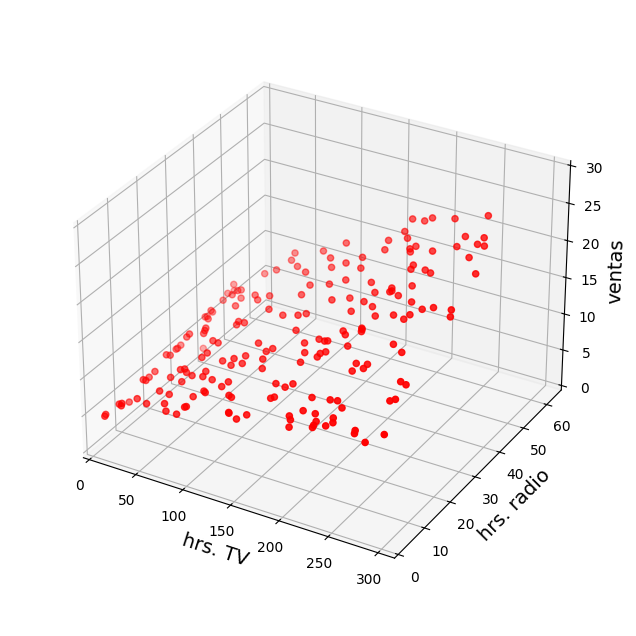

In [3]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# datos
ax.scatter(x_tv, x_rd, y, color='r')
# formato
ax.set_xlabel('hrs. TV', fontsize=14)
ax.set_ylabel('hrs. radio', fontsize=14)
ax.set_zlabel('ventas', fontsize=14)
ax.set_xlim([ 0, 310 ])
ax.set_ylim([ 0, 65 ])
ax.set_zlim([ 0, 30 ])
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.show()

Modelamos la relación como una función afín
$$
    y_{\text{sales},i} \approx \beta_0 + \beta_1 x_{\text{TV},i} + \beta_2 x_{\text{radio},i} + \beta_3 x_{\text{newspaper},i}.
$$


In [4]:
# numero de variables
n = 3
# matriz de coeficientes
A = np.zeros((m, n))
# 1ra columna:  factor constante
A[:, 0] = 1
# 2da columna:  x_tv
A[:, 1] = x_tv
# 3ra columna:  x_rd
A[:, 2] = x_rd

Resolvemos el sistema.

In [5]:
# factorización QR
[ Q, R ] = np.linalg.qr(A)
# resolución
z = np.linalg.solve(R.T, A.T @ y)
beta = np.linalg.solve(R, z)

print('Coeficientes:')
print(beta)
print('Residuo:')
print(np.linalg.norm(y - A @ beta) ** 2)

Coeficientes:
[2.92109991 0.04575482 0.18799423]
Residuo:
556.9139800676185


Una vez resuelto, podemos estudiar las predicciones del modelo.

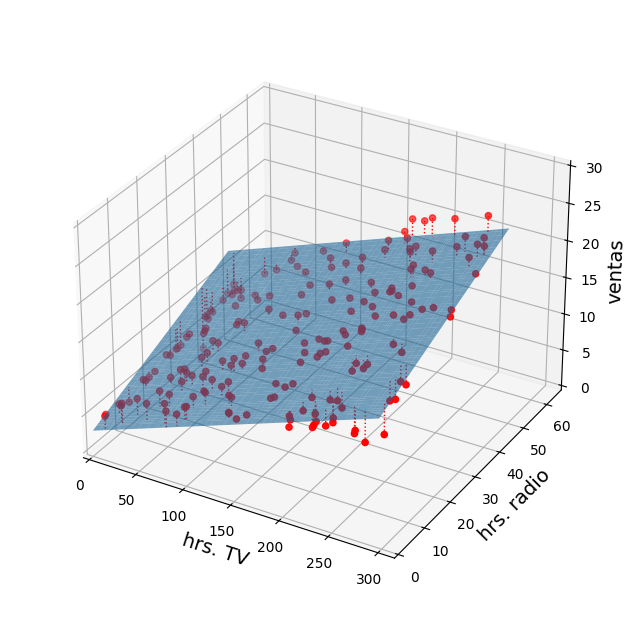

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# datos
ax.scatter(x_tv, x_rd, y, color='r')
# prediccion
[ m_tv, m_rd ] = np.meshgrid(np.sort(x_tv), np.sort(x_rd)) 
ax.plot_surface(m_tv, m_rd, beta[0] + beta[1] * m_tv + beta[2] * m_rd, alpha=0.6)
# residuo
for _x_tv, _x_rd, _y in zip(x_tv, x_rd, y):
    ax.plot([_x_tv, _x_tv], [_x_rd, _x_rd], [_y, beta[0] + beta[1] * _x_tv + beta[2] * _x_rd], color='r', linewidth=1, linestyle=':')
# formato
ax.set_xlabel('hrs. TV', fontsize=14)
ax.set_ylabel('hrs. radio', fontsize=14)
ax.set_zlabel('ventas', fontsize=14)
ax.set_xlim([ 0, 310 ])
ax.set_ylim([ 0, 65 ])
ax.set_zlim([ 0, 30 ])
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.show()

<h3 id='reg-poly'> Regresión polinomial </h3>

El modelo afín no captura bien el comportamiento de los datos cuando los predictores están cerca de sus valores extremos. Proponemos el siguiente modelo
$$
    y_{\text{sales},i} \approx \beta_0 + \beta_1 x_{\text{TV},i} + \beta_2 x_{\text{radio},i} + \beta_3 x_{\text{TV},i}x_{\text{radio},i} 
$$
que incorpora interacciones entre las variables a través del producto de los valores de los regresores.

In [7]:
# numero de variables
n = 4
# matriz de coeficientes
A = np.zeros((m, n))
# 1ra columna:  factor constante
A[:, 0] = 1
# 2da columna:  x_tv
A[:, 1] = x_tv
# 3ra columna:  x_rd
A[:, 2] = x_rd
# 4ta columna:  x_tv x_rd
A[:, 3] = x_tv * x_rd

Resolvemos el sistema.

In [8]:
# factorización QR
[ Q, R ] = np.linalg.qr(A)
# resolución
z = np.linalg.solve(R.T, A.T @ y)
beta = np.linalg.solve(R, z)

print('Coeficientes:')
print(beta)
print('Residuo:')
print(np.linalg.norm(y - A @ beta) ** 2)

Coeficientes:
[6.75022020e+00 1.91010738e-02 2.88603399e-02 1.08649470e-03]
Residuo:
174.48338262772717


Estudiamos las predicciones del modelo.

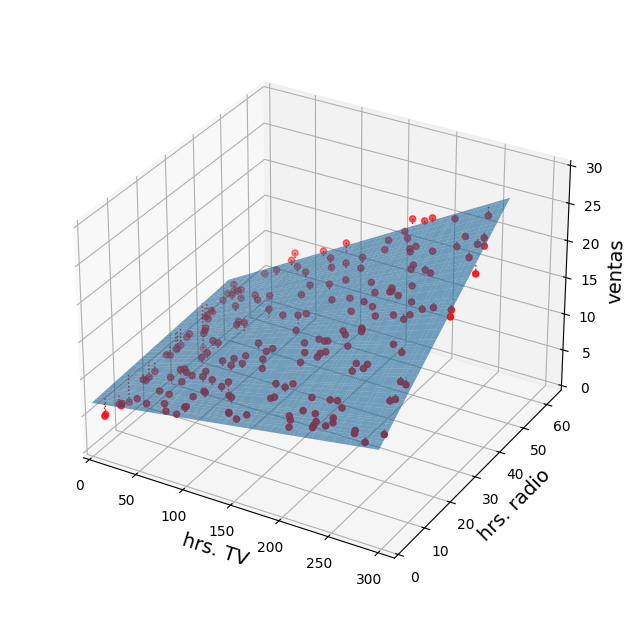

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# datos
ax.scatter(x_tv, x_rd, y, color='r')
# prediccion
[ m_tv, m_rd ] = np.meshgrid(np.sort(x_tv), np.sort(x_rd)) 
ax.plot_surface(m_tv, m_rd, beta[0] + beta[1] * m_tv + beta[2] * m_rd + beta[3] * m_tv * m_rd, alpha=0.6)
# residuo
for _x_tv, _x_rd, _y in zip(x_tv, x_rd, y):
    ax.plot([_x_tv, _x_tv], [_x_rd, _x_rd], [_y, beta[0] + beta[1] * _x_tv + beta[2] * _x_rd + beta[3] * _x_tv * _x_rd ], color='r', linewidth=1, linestyle=':')
# formato
ax.set_xlabel('hrs. TV', fontsize=14)
ax.set_ylabel('hrs. radio', fontsize=14)
ax.set_zlabel('ventas', fontsize=14)
ax.set_xlim([ 0, 310 ])
ax.set_ylim([ 0, 65 ])
ax.set_zlim([ 0, 30 ])
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.show()

<h2 id='proj'>  <b>Tutorial:</b> Mejor aproximación </h2>

<h3 id='proj-intro'> Motivación </h3>

En algunos problemas en altas dimensiones, observamos una señal del tiempo que deseamos aproximar usando algunas funciones conocidas. Consideramos en este caso una señal dada por la expresión
$$
    s(t) = 2.5 t(1-t)\cos(2\pi (1.1 t + 0.5)^3)
$$
para $t\in [0, 1]$.

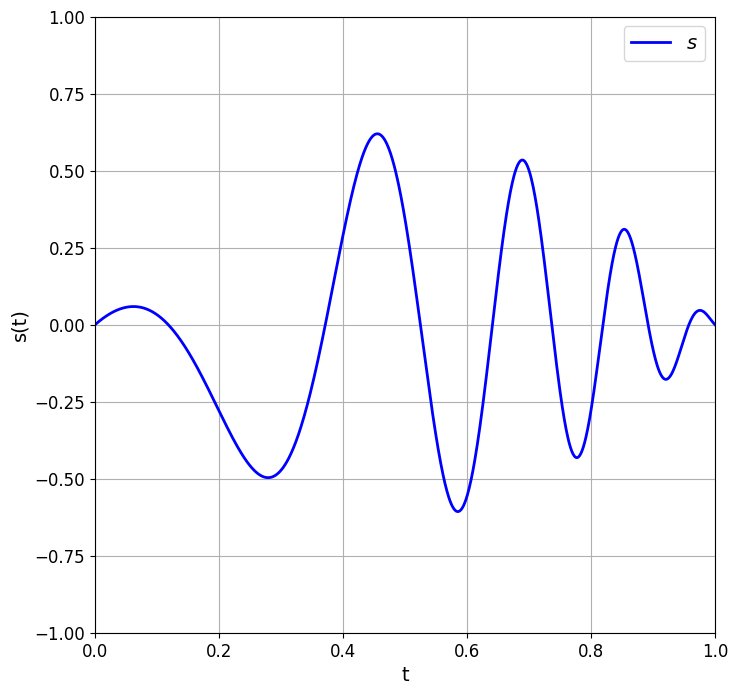

In [10]:
# función
s = lambda t : 2.5 * t * (1 - t) * np.cos(2 * np.pi * (1.1 * t + 0.5) ** 3)
# puntos de evaluacion
t = np.linspace(0, 1, 1000)

plt.figure(figsize=(8, 8))
plt.plot(t, s(t), label='$s$', linewidth=2, color='b')
plt.xlim([ 0.0, 1.0 ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.ylabel('s(t)', fontsize=14)
plt.xlabel('t', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Para este problema, suponemos que queremos aproximar $s$ con funciones de la forma
$$
    \varphi_i(t) = \max(0, 1 - |t - i/n|)\quad \text{para}\quad i\in \{0,\ldots, n-1\}
$$
donde $n$ es relativamente pequeño. Supondremos que $n = 16$.

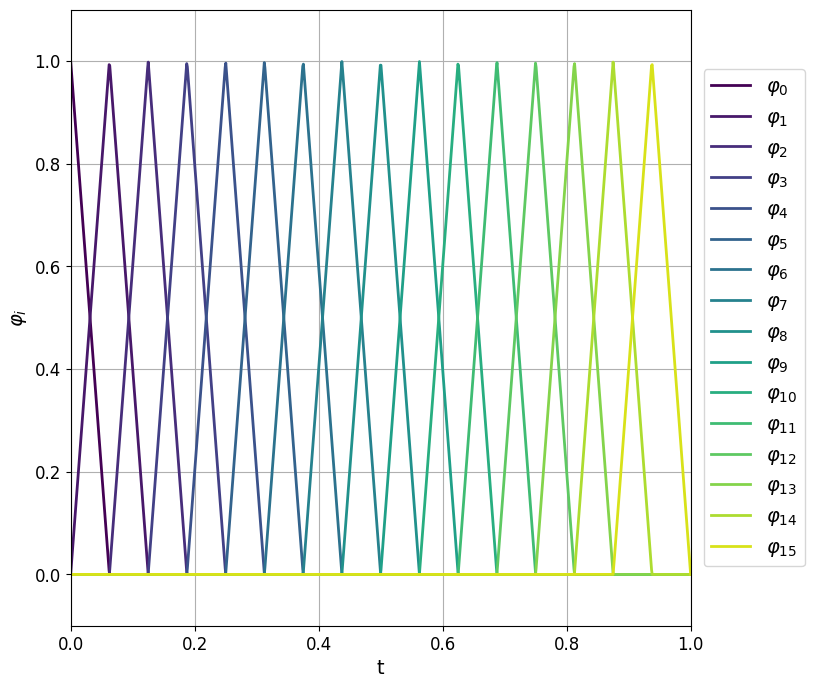

In [11]:
# número de funciones
n = 16
# funciones
phi = lambda t, I : np.maximum(0.0, 1 - np.abs(n * t - I))

plt.figure(figsize=(8, 8))
for I in range(n):
    plt.plot(t, phi(t, I), linewidth=2, color=cm['viridis'](I/n), label='$\\varphi_{{{:d}}}$'.format(I))
plt.xlim([ 0.0, 1.0 ])
plt.ylim([ -0.1, +1.1 ])
plt.grid(True)
plt.ylabel('$\\varphi_i$', fontsize=14)
plt.legend(fontsize=14, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.xlabel('t', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Nuestro objetivo es encontrar la mejor aproximación de $s$ usando las funciones $\varphi_0,\ldots, \varphi_{n-1}$. En otras palabras, buscamos $x_0,\ldots, x_{n-1}$ tales que
$$
    s(t) \approx x_0 \varphi_0(t) + \ldots + x_{n-1} \varphi_{n-1}(t)\quad\text{para}\quad t\in [0,1].
$$
Como criterio de ajuste, usamos la suma del cuadrado de los residuos en instantes de la forma
$$
    t_i = \frac{i}{m} \quad\text{con}\quad i\in\{0,\ldots, m-1\}
$$
donde $m$ es **mucho mayor** que $n$. En este problema consideramos $m = 2048$. Los residuos tienen la forma
$$
    r_i = s(i/m) - x_0 \varphi_0(i/m) + \ldots + x_{n-1} \varphi_{n-1}(i/m)
$$
de modo que deseamos escoger $x_0,\ldots, x_{n-1}$ de modo que
$$
    \sum_{i=0}^{m-1} r_i^2 = \sum_{i=0}^{m-1} (s(i/m) - x_0 \varphi_0(i/m) + \ldots + x_{n-1} \varphi_{n-1}(i/m))^2
$$
sea mínimo.

In [12]:
# observaciones
m = 2048

<h3 id='proj-matrix'> Ensamblando el sistema </h3>

Primero ensamblamos el vector de observaciones.

In [13]:
# observaciones
y = np.array([ s(I/m) for I in range(m) ], dtype=float)

Luego ensamblamos la matriz.

In [14]:
A = np.vstack([ np.array([ phi(I/m, J) for I in range(m) ]) for J in range(n) ]).T

<h3 id='proj-sol'> Solución </h3>

Resolvemos el sistema usando la factorización QR.

In [15]:
# factorización QR
[ Q, R ] = np.linalg.qr(A)
# resolución
z = np.linalg.solve(R.T, A.T @ y)
x = np.linalg.solve(R, z)

print('Residuo:')
print(np.linalg.norm(y - A @ x) ** 2)

Residuo:
11.539197438069163


Verificamos que la función aproximante se asemeja a la función original $s$.

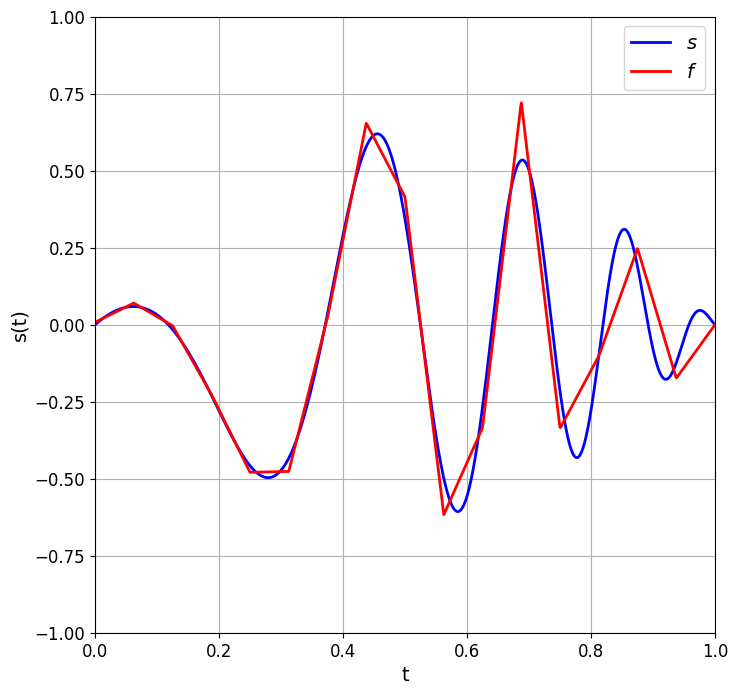

In [16]:
# puntos de evaluacion
t = np.linspace(0, 1, 1000)

# function aproximante
f = np.sum(np.vstack([ _x * phi(t, I) for I, _x in enumerate(x) ]), axis=0)

plt.figure(figsize=(8, 8))
plt.plot(t, s(t), label='$s$', linewidth=2, color='b')
plt.plot(t, f, label='$f$', linewidth=2, color='r')
plt.xlim([ 0.0, 1.0 ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.ylabel('s(t)', fontsize=14)
plt.xlabel('t', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()